In [5]:
import mysql.connector
import pandas as pd

# LOAD SQL CURSOR AND TABLE INFORMATION

In [6]:
with open('hidden.txt') as f:
    lines = f.readline()

mydb = mysql.connector.connect(host='localhost', user='hall_m', password=lines, database='rightmove')
mycursor = mydb.cursor(buffered=True)

In [7]:
mycursor.execute("""DESCRIBE `buckinghamshire` """)
cols = mycursor.fetchall()
df = pd.DataFrame(cols, columns =['Field', 'Type', 'Null', 'Key', 'Default', 'Extra'])
df

,Field,Type,Null,Key,Default,Extra
0,propertyId,int,NO,PRI,None,
1,propertySubType,varchar(50),YES,,None,
2,propertyType,varchar(50),YES,,None,
3,retirement,varchar(10),YES,,None,
4,soldSTC,varchar(10),YES,,None,
5,preOwned,varchar(20),YES,,None,
6,latitude,float,YES,,None,
7,longitude,float,YES,,None,
8,beds,tinyint,YES,,None,
9,bathrooms,tinyint,YES,,None,


# ESTATE AGENT MARKET SHARE

<AxesSubplot:title={'center':'Top 20 Estate Agents Market Share in Buckinghamshire'}, xlabel='companyName'>

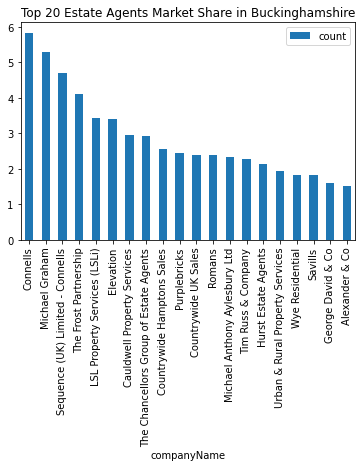

In [8]:
# Make a new table 'grouped' with a new column 'total_properties'. 
mycursor.execute(""" WITH `grouped` AS (
	                    SELECT `companyName`, COUNT(`propertyId`) as `total_properties`
                        FROM `buckinghamshire`
                        GROUP BY `companyName`)
                    SELECT `companyName`, `total_properties` * 100 / (SELECT COUNT(`propertyId`)
                        FROM `buckinghamshire`) FROM `grouped`
	                    ORDER BY `total_properties` / (SELECT COUNT(`propertyId`) FROM `buckinghamshire`) DESC
                        LIMIT 20; """)
df = pd.DataFrame(mycursor.fetchall(), columns =['companyName', 'count'])
df = df.astype({'count':'float'})
df.plot(x = 'companyName', y = 'count', kind='bar', title ='Top 20 Estate Agents Market Share in Buckinghamshire')

<AxesSubplot:title={'center':'Bottom 20 Estate Agents Market Share in Buckinghamshire'}, xlabel='companyName'>

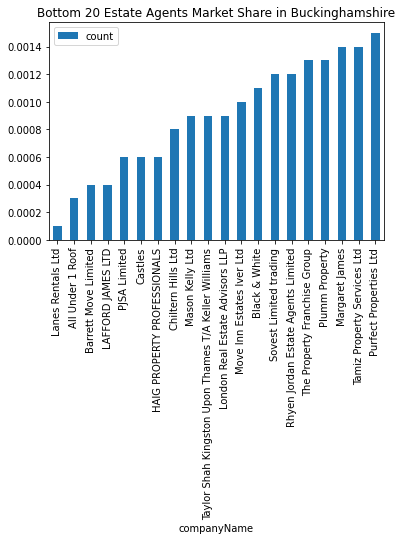

In [9]:
# Make a new table 'grouped' with a new column 'total_properties'. 
mycursor.execute(""" WITH `grouped` AS (
	                    SELECT `companyName`, COUNT(`propertyId`) as `total_properties`
                        FROM `buckinghamshire`
                        GROUP BY `companyName`)
                    SELECT `companyName`, `total_properties` / (SELECT COUNT(`propertyId`) 
                        FROM `buckinghamshire`) FROM `grouped`
	                    ORDER BY `total_properties` * 100 / (SELECT COUNT(`propertyId`) FROM `buckinghamshire`) ASC
                        LIMIT 20; """)
df = pd.DataFrame(mycursor.fetchall(), columns =['companyName', 'count'])
df = df.astype({'count':'float'})
df.plot(x = 'companyName', y = 'count', kind='bar', title ='Bottom 20 Estate Agents Market Share in Buckinghamshire')

In [10]:
mycursor1 = mydb.cursor(buffered=True)
mycursor2 = mydb.cursor(buffered=True)
mycursor1.execute("""SELECT `companyName`, COUNT(`propertyId`) FROM `buckinghamshire`
                    WHERE `companyName` = 'purplebricks'; """)
properties = mycursor1.fetchall()
mycursor2.execute(""" SELECT COUNT(*) FROM `buckinghamshire`; """)
total_properties = mycursor2.fetchall()
print(f'Purplebricks market share: {float(properties[0][1])*100/float(total_properties[0][0])}')

Purplebricks market share: 2.454516094305092


# ESTATE AGENT AVERAGE PRICED PROPERTY

<AxesSubplot:title={'center':'Average Price of Property (£m)'}, xlabel='companyName'>

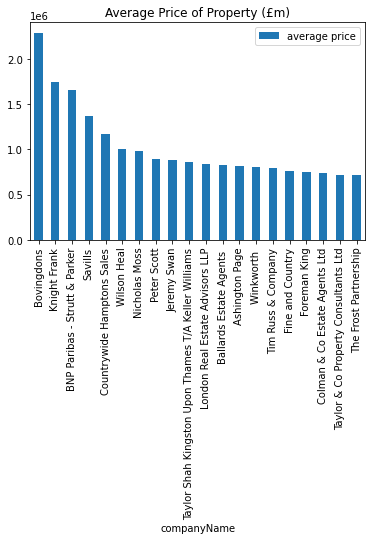

In [11]:
mycursor.execute(""" SELECT `companyName`, ROUND(AVG(`price`),2) as `average` FROM `buckinghamshire`
                        GROUP BY `companyName`
                        ORDER BY `average` DESC
                        LIMIT 20; """)
df = pd.DataFrame(mycursor.fetchall(), columns =['companyName', 'average price'])
df = df.astype({'average price':'float'})
df.plot(x = 'companyName', y = 'average price', kind='bar', title ='Average Price of Property (£m)')

<AxesSubplot:title={'center':'Average Price of Property (£)'}, xlabel='companyName'>

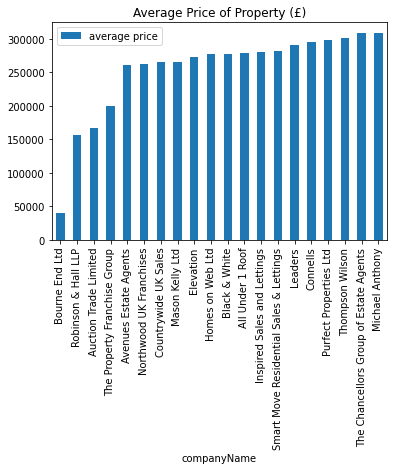

In [12]:
mycursor.execute(""" SELECT `companyName`, ROUND(AVG(`price`),2) as `average` FROM `buckinghamshire`
                        GROUP BY `companyName`
                        ORDER BY `average` ASC
                        LIMIT 20; """)
df = pd.DataFrame(mycursor.fetchall(), columns =['companyName', 'average price'])
df = df.astype({'average price':'float'})
df.plot(x = 'companyName', y = 'average price', kind='bar', title ='Average Price of Property (£)')

# ESTATE AGENT BRANCHES WITH MOST SOLD STC PROPERTIES

In [22]:
mycursor.execute(""" SELECT `branchId`, `companyName`, `branchName`, COUNT(`propertyId`) FROM `buckinghamshire`
                        WHERE `soldSTC` = 1 
                        GROUP BY `branchId`
                        ORDER BY COUNT(`propertyId`) DESC
                        LIMIT 20; """)
df = pd.DataFrame(mycursor.fetchall(), columns =['branchId', 'companyName', 'branchName', 'COUNT'])
df = df.astype({'COUNT':'float'})
df

,branchId,companyName,branchName,COUNT
0,12195,Cauldwell Property Services,Milton Keynes,221.0
1,203051,Purplebricks,covering Milton Keynes,177.0
2,11202,Michael Anthony Aylesbury Ltd,Aylesbury,164.0
3,3734,Elevation,Milton Keynes,151.0
4,909,George David & Co,Aylesbury,133.0
5,22868,Hurst Estate Agents,High Wycombe,116.0
6,64008,Urban & Rural Property Services,Milton Keynes,111.0
7,5386,LSL Property Services (LSLi),High Wycombe,106.0
8,36950,Elevation,Milton Keynes - New Homes,102.0
9,51770,Williams Estate Agents,Aylesbury,102.0


# ESTATE AGENTS WITH LARGE BOOK OF UNSOLD PROPERTIES

<AxesSubplot:xlabel='companyName'>

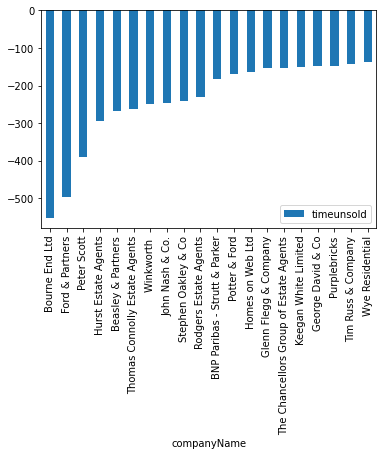

In [29]:
mycursor.execute(""" SELECT `companyName`, COUNT(`propertyId`) as `propertynum`, AVG(DATEDIFF(added, '20211028')) as `timeunsold` FROM `buckinghamshire`
                        WHERE `soldSTC` = 0
                        GROUP BY `companyName`
                        HAVING COUNT(`propertyId`) > 10
                        ORDER BY `timeunsold` ASC
                        LIMIT 20; """)
df = pd.DataFrame(mycursor.fetchall(), columns =['companyName', 'propertynum', 'timeunsold'])
df = df.astype({'timeunsold':'float', 'propertynum':'float'})
df.plot(x ="companyName", y = 'timeunsold', kind = 'bar')